<a href="https://colab.research.google.com/github/hbskay3110/bt/blob/main/Lab_6_20130298_NguyenTrungKien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with classification task using **Random Forests** and **Naïve Bayes** algorithms with/without **Feature Selection**. 

*   **Deadline: 23:59, 25/03/2023**



# Import libraries

In [1]:
# code
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/DATA_ML'



Mounted at /content/gdrive
/content/gdrive/MyDrive/DATA_ML


In [2]:
import numpy
from prettytable import PrettyTable
from sklearn import datasets
from sklearn import metrics
from pandas import read_csv
from sklearn import tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from numpy import set_printoptions
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Task 1. 
Task 1. Compare the performance of selected classification algorithms including **Random forest**, **NaiveBayes**, and **SVM** with **mnist** dataset based on **accuracy, precision, recall, f1** measures according to **without using selection feature** and **using selection feature**.



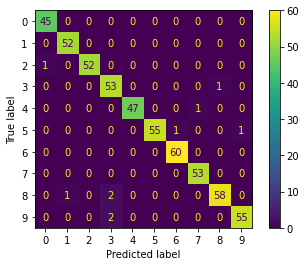

In [ ]:
# code
mnist =  datasets.load_digits(as_frame=True)

X = mnist.data
y = mnist.target
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.3,random_state=0)
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rfcAccs = metrics.accuracy_score(y_test, y_pred);
rfcPrecss = metrics.precision_score(y_test, y_pred,average='macro');
rfcRecalls = metrics.recall_score(y_test, y_pred,average='macro');
rfcF1s = metrics.f1_score(y_test, y_pred,average='macro');
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
RF=['RF', round(rfcAccs,2), round(rfcPrecss,2), round(rfcRecalls,2), round(rfcF1s,2)]

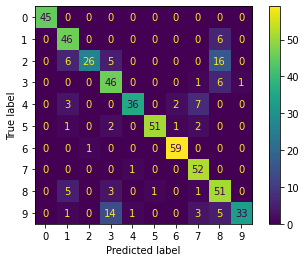

In [ ]:
# GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
gnbAccs = metrics.accuracy_score(y_test, y_pred);
gnbPrecss = metrics.precision_score(y_test, y_pred,average='macro');
gnbRecalls = metrics.recall_score(y_test, y_pred,average='macro');
gnbF1s = metrics.f1_score(y_test, y_pred,average='macro');
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
NB=['Naive_Bayes', round(gnbAccs,2), round(gnbPrecss,2), round(gnbRecalls,2), round(gnbF1s,2)]

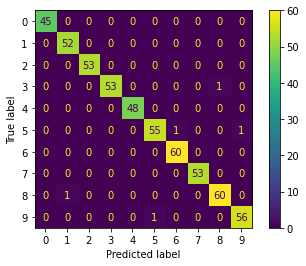

In [ ]:
clf = svm.SVC(kernel='rbf') # rbf Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
smvAccs = metrics.accuracy_score(y_test, y_pred);
smvPrecss = metrics.precision_score(y_test, y_pred,average='macro');
smvRecalls = metrics.recall_score(y_test, y_pred,average='macro');
smvF1s = metrics.f1_score(y_test, y_pred,average='macro');
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
RBF=['RBF Kernel', round(smvAccs,2), round(smvAccs,2), round(smvRecalls,2), round(smvF1s,2)]

In [ ]:
clf = RandomForestClassifier()
clf.fit(mnist['data'], mnist['target'])

RandomForestClassifier()

In [ ]:
feature_sr = pd.Series(clf.feature_importances_,index=mnist.feature_names).sort_values(ascending=False)
feature_imp = feature_sr.head(30)
print(feature_imp)

pixel_2_5    0.048171
pixel_5_3    0.044582
pixel_3_2    0.039897
pixel_4_4    0.039527
pixel_5_2    0.035937
pixel_2_4    0.033673
pixel_3_4    0.032345
pixel_4_1    0.031241
pixel_7_5    0.030471
pixel_1_5    0.029900
pixel_3_6    0.028678
pixel_1_2    0.028612
pixel_4_6    0.028007
pixel_3_3    0.026727
pixel_2_3    0.026611
pixel_4_2    0.025745
pixel_6_6    0.025608
pixel_3_5    0.023809
pixel_7_2    0.022604
pixel_7_4    0.022372
pixel_2_2    0.022044
pixel_6_5    0.021911
pixel_6_3    0.020945
pixel_5_4    0.020864
pixel_0_5    0.020604
pixel_4_5    0.019969
pixel_0_2    0.019764
pixel_5_6    0.019558
pixel_4_3    0.018995
pixel_6_2    0.018266
dtype: float64


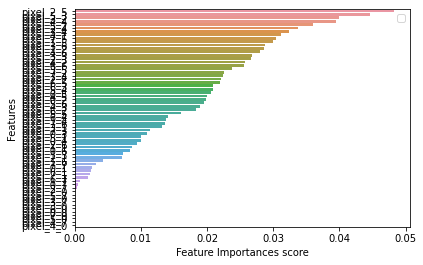

In [ ]:
sns.barplot(x=feature_sr, y=feature_sr.index)
plt.xlabel('Feature Importances score')
plt.ylabel('Features')
plt.legend()
plt.show()

In [ ]:
x_new1 = mnist['data'][feature_imp.index]
x_train, x_test, y_train, y_test = train_test_split(x_new1, mnist['target'], test_size=0.3, random_state=1)

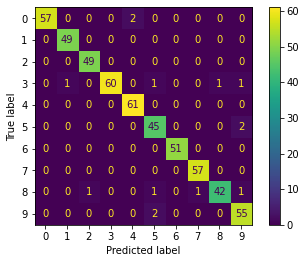

In [ ]:
#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
ac = metrics.accuracy_score(y_test, y_pred)
ps = metrics.precision_score(y_test, y_pred, average='macro')
rs = metrics.recall_score(y_test, y_pred, average='macro')
fs = metrics.f1_score(y_test, y_pred, average='macro')
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
RF_feature=['RF feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

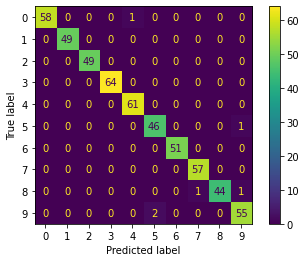

In [ ]:
clf = svm.SVC(kernel='rbf') # rbf Kernel
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
smvAccs = metrics.accuracy_score(y_test, y_pred);
smvPrecss = metrics.precision_score(y_test, y_pred,average='macro');
smvRecalls = metrics.recall_score(y_test, y_pred,average='macro');
smvF1s = metrics.f1_score(y_test, y_pred,average='macro');
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
RBF_feature=['RBF Kernel feature', round(smvAccs,2), round(smvPrecss,2), round(smvRecalls,2), round(smvF1s,2)]

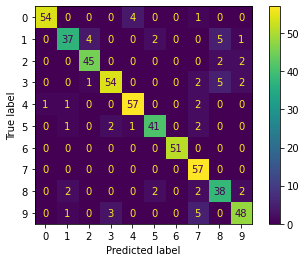

In [ ]:
# GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
gnbAccs = metrics.accuracy_score(y_test, y_pred);
gnbPrecss = metrics.precision_score(y_test, y_pred,average='macro');
gnbRecalls = metrics.recall_score(y_test, y_pred,average='macro');
gnbF1s = metrics.f1_score(y_test, y_pred,average='macro');
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
NB_feature=['Naive Bayes feature', round(gnbAccs,2), round(gnbPrecss,2), round(gnbRecalls,2), round(gnbF1s,2)]

In [ ]:
t = PrettyTable(['Classification', 'Accuracy', 'Precision', 'Recall', 'F1'])

t.add_row(RF)
t.add_row(NB)
t.add_row(RBF)
t.add_row(RF_feature)
t.add_row(NB_feature)
t.add_row(RBF_feature)
print(t)

+---------------------+----------+-----------+--------+------+
|    Classification   | Accuracy | Precision | Recall |  F1  |
+---------------------+----------+-----------+--------+------+
|          RF         |   0.97   |    0.97   |  0.97  | 0.97 |
|     Naive_Bayes     |   0.82   |    0.86   |  0.83  | 0.82 |
|      RBF Kernel     |   0.99   |    0.99   |  0.99  | 0.99 |
|      RF feature     |   0.97   |    0.97   |  0.97  | 0.97 |
| Naive Bayes feature |   0.89   |    0.89   |  0.89  | 0.89 |
|  RBF Kernel feature |   0.99   |    0.99   |  0.99  | 0.99 |
+---------------------+----------+-----------+--------+------+


#Task 2. 
For given bank dataset (bank.csv) having the following attributes :
1.	**age** (numeric)
2.	**job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	**marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.	**education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	**default**: has credit in default? (categorical: 'no','yes','unknown')
6.	**housing**: has housing loan? (categorical: 'no','yes','unknown')
7.	**loan**: has personal loan? (categorical: 'no','yes','unknown')
8.	**contact**: contact communication type (categorical: 'cellular','telephone')
9.	**month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	**day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	**duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12.	**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	**previous**: number of contacts performed before this campaign and for this client (numeric)
15.	**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Output variable (desired target):
16.	**y**. has the client subscribed a term deposit? (binary: 'yes','no')



In [3]:
data = pd.read_csv('bank.csv')


#3.1. Apply StandardScaler() function to columns that contains numerical data ('age', 'balance', 'day', 'campaign', 'pdays', 'previous')

In [4]:
#code
sc = StandardScaler()
data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']] = sc.fit_transform(data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,1042,-0.554168,-0.481184,-0.363260,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,1467,-0.554168,-0.481184,-0.363260,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,1389,-0.554168,-0.481184,-0.363260,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,579,-0.554168,-0.481184,-0.363260,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,673,-0.186785,-0.481184,-0.363260,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,blue-collar,single,primary,no,-0.473616,yes,no,cellular,0.515650,apr,257,-0.554168,-0.481184,-0.363260,unknown,no
11158,-0.187357,services,married,secondary,no,-0.246658,no,no,unknown,0.040612,jun,83,0.547981,-0.481184,-0.363260,unknown,no
11159,-0.774958,technician,single,secondary,no,-0.464934,no,no,cellular,0.396891,aug,156,-0.186785,-0.481184,-0.363260,unknown,no
11160,0.148416,technician,married,secondary,no,-0.473926,no,yes,cellular,-0.909466,may,9,-0.186785,1.109571,1.818332,failure,no


#3.2. Apply Encode Categorical Value (OneHotEncoder) to transfrom categorical data to numerical data ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome')

In [5]:
#code
#code
encoder = OneHotEncoder()
en_data = encoder.fit_transform(data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])
en_df = pd.DataFrame(en_data.toarray(), columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']))
data = pd.concat([data, en_df], axis=1)
data.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], inplace=True)
data


,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1042,-0.554168,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.239676,-0.459974,-1.265746,1467,-0.554168,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.019470,-0.080160,-1.265746,1389,-0.554168,-0.481184,-0.363260,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.155733,0.293762,-1.265746,579,-0.554168,-0.481184,-0.363260,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.071790,-0.416876,-1.265746,673,-0.186785,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,257,-0.554168,-0.481184,-0.363260,no,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.187357,-0.246658,0.040612,83,0.547981,-0.481184,-0.363260,no,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,-0.774958,-0.464934,0.396891,156,-0.186785,-0.481184,-0.363260,no,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,0.148416,-0.473926,-0.909466,9,-0.186785,1.109571,1.818332,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
data['deposit'] = data['deposit'].map({'yes':1, 'no' : 0})
x_train, x_test, y_train, y_test = train_test_split(data.drop(['deposit'], axis=1), data['deposit'], test_size=0.3, random_state=1)
data


,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1042,-0.554168,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.239676,-0.459974,-1.265746,1467,-0.554168,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.019470,-0.080160,-1.265746,1389,-0.554168,-0.481184,-0.363260,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.155733,0.293762,-1.265746,579,-0.554168,-0.481184,-0.363260,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.071790,-0.416876,-1.265746,673,-0.186785,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,257,-0.554168,-0.481184,-0.363260,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.187357,-0.246658,0.040612,83,0.547981,-0.481184,-0.363260,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,-0.774958,-0.464934,0.396891,156,-0.186785,-0.481184,-0.363260,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,0.148416,-0.473926,-0.909466,9,-0.186785,1.109571,1.818332,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#3.3. Apply **Decision tree, Random forest, kNN, NaïveBayes** to preproceed dataset in the previous steps. Then compare the obtained results using **accuracy, precision, recall, f1** measures.

In [34]:
#code

#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

[0 0 0 ... 0 0 0]


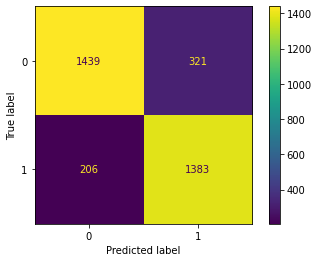

In [36]:

y_pred = clf.predict(x_test)
print(y_pred)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
Accuracy_RdForest = metrics.accuracy_score(y_test, y_pred)
Precision_RdForest = metrics.precision_score(y_test, y_pred)
Recall_RdForest = metrics.recall_score(y_test, y_pred)
F1_RdForest = metrics.f1_score(y_test, y_pred)

# print(metrics.classification_report(y_test, y_pred)
RF =['RandomForest', round(Accuracy_RdForest, 2), round(Precision_RdForest, 2), round(Recall_RdForest, 2), round(F1_RdForest, 2)]

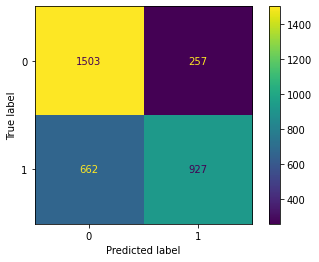

In [14]:
#NaiveBayes
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
Accuracy_NaiveBayes=  metrics.accuracy_score(y_test, y_pred)
Precision_NaiveBayes=  metrics.precision_score(y_test, y_pred)
Recall_NaiveBayes= metrics.recall_score(y_test, y_pred)
F1_NaiveBayes= metrics.f1_score(y_test, y_pred)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
NB =['NeiveBayes', round(Accuracy_NaiveBayes, 2), round(Precision_NaiveBayes, 2), round(Recall_NaiveBayes, 2), round(F1_NaiveBayes, 2)]

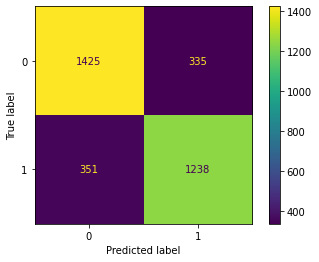

In [13]:

#tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
Accuracy_Tree=  metrics.accuracy_score(y_test, y_pred)
Precision_Tree=  metrics.precision_score(y_test, y_pred)
Recall_Tree= metrics.recall_score(y_test, y_pred)
F1_Tree= metrics.f1_score(y_test, y_pred)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

Tree =['Decision Tree', round(Accuracy_Tree, 2), round(Precision_Tree, 2), round(Recall_Tree, 2), round(F1_Tree, 2)]

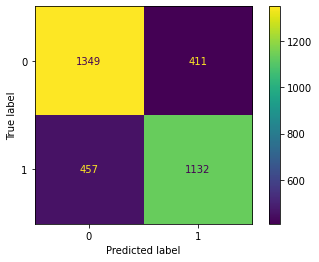

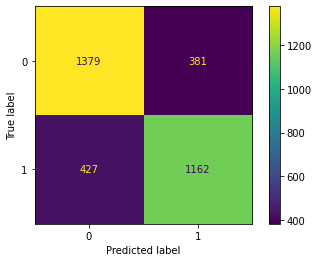

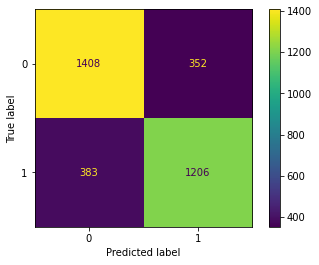

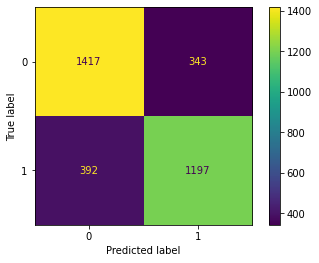

In [15]:
k_range = range(1, 8, 2)
accs =[ ]
precision= [ ]
recalls = []
f1measure = [ ]
for i in k_range:
  kNM = KNeighborsClassifier(n_neighbors=i);
  kNM.fit(x_train, y_train)
  y_pred = kNM.predict(x_test)
  accs.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred))
  recalls.append(metrics.recall_score(y_test, y_pred))
  f1measure.append(metrics.f1_score(y_test, y_pred))
  metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

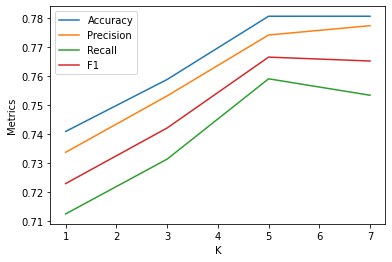

In [16]:

plt.plot(k_range, accs, label='Accuracy')
plt.plot(k_range, precision, label='Precision')
plt.plot(k_range, recalls, label='Recall')
plt.plot(k_range, f1measure, label='F1')
plt.xlabel('K')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [17]:
KNN=['KNN', accs[2], precision[2], recalls[2], f1measure[2]]
KNN

['KNN',
 0.7805315019408778,
 0.7740693196405648,
 0.7589679043423537,
 0.7664442326024785]

#3.4. Using selection feature to above dataset, then compare the classification results with those in Task 2.3. 

In [18]:
#code

#code
clf = RandomForestClassifier()
x = data.drop(['deposit'], axis=1)
clf.fit(x, data['deposit'])

RandomForestClassifier()

In [19]:
feature_imp = pd.Series(clf.feature_importances_, index=clf.feature_names_in_).sort_values(ascending=False)
feature_imp.head(20)

duration               0.329911
balance                0.075812
age                    0.075332
day                    0.066301
pdays                  0.035657
campaign               0.034003
poutcome_success       0.026766
contact_unknown        0.022176
previous               0.020263
contact_cellular       0.018328
housing_yes            0.016039
housing_no             0.015825
month_apr              0.013235
month_mar              0.012482
month_may              0.011968
month_aug              0.011473
poutcome_unknown       0.011054
month_oct              0.010962
month_jun              0.010067
education_secondary    0.009652
dtype: float64

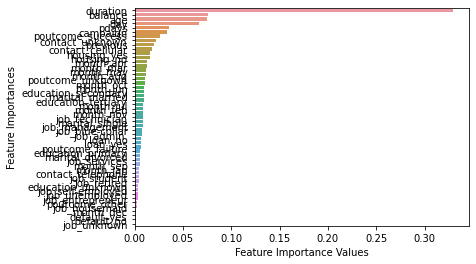

In [20]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Values')
plt.ylabel('Feature Importances')
plt.show()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data[feature_imp.index[:21].values], data['deposit'], test_size=0.3, random_state=1)

In [22]:

#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

[0 0 0 ... 0 1 0]


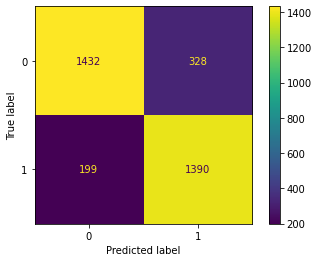

In [24]:
y_pred = clf.predict(x_test)
print(y_pred)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
Accuracy_RdForest = metrics.accuracy_score(y_test, y_pred)
Precision_RdForest = metrics.precision_score(y_test, y_pred)
Recall_RdForest = metrics.recall_score(y_test, y_pred)
F1_RdForest = metrics.f1_score(y_test, y_pred)

RF_Feature =['RandomForestFeature', round(Accuracy_RdForest, 2), round(Precision_RdForest, 2), round(Recall_RdForest, 2), round(F1_RdForest, 2)]

In [27]:
#NaiveBayes
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
Accuracy_NaiveBayes=  metrics.accuracy_score(y_test, y_pred)
Precision_NaiveBayes=  metrics.precision_score(y_test, y_pred)
Recall_NaiveBayes= metrics.recall_score(y_test, y_pred)
F1_NaiveBayes= metrics.f1_score(y_test, y_pred)

print(metrics.classification_report(y_test, y_pred))
NB_feature =['NeiveBayesFeature', round(Accuracy_NaiveBayes, 2), round(Precision_NaiveBayes, 2), round(Recall_NaiveBayes, 2), round(F1_NaiveBayes, 2)]

              precision    recall  f1-score   support

           0       0.69      0.89      0.78      1760
           1       0.83      0.56      0.67      1589

    accuracy                           0.74      3349
   macro avg       0.76      0.73      0.72      3349
weighted avg       0.76      0.74      0.73      3349



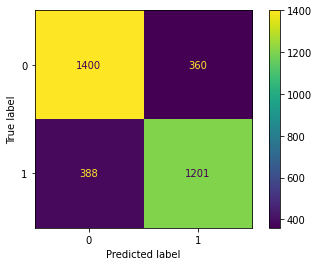

In [29]:
#tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
Accuracy_Tree=  metrics.accuracy_score(y_test, y_pred)
Precision_Tree=  metrics.precision_score(y_test, y_pred)
Recall_Tree= metrics.recall_score(y_test, y_pred)
F1_Tree= metrics.f1_score(y_test, y_pred)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

# print(metrics.classification_report(y_test, y_pred))
Tree_Feature =['Decision Tree Feature', round(Accuracy_Tree, 2), round(Precision_Tree, 2), round(Recall_Tree, 2), round(F1_Tree, 2)]

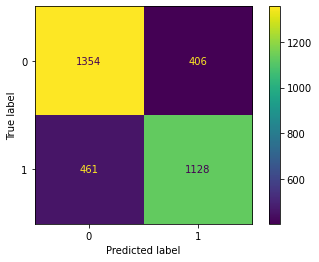

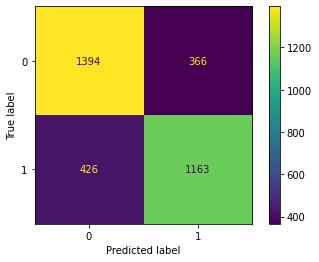

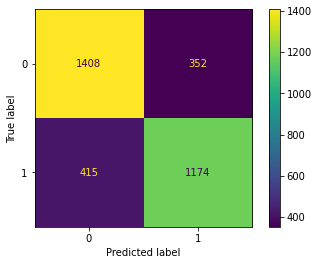

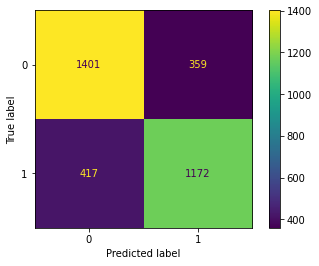

In [30]:
k_range = range(1, 8, 2)
accs =[ ]
precision= [ ]
recalls = []
f1measure = [ ]
for i in k_range:
  kNM = KNeighborsClassifier(n_neighbors=i);
  kNM.fit(x_train, y_train)
  y_pred = kNM.predict(x_test)
  accs.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred))
  recalls.append(metrics.recall_score(y_test, y_pred))
  f1measure.append(metrics.f1_score(y_test, y_pred))
  metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

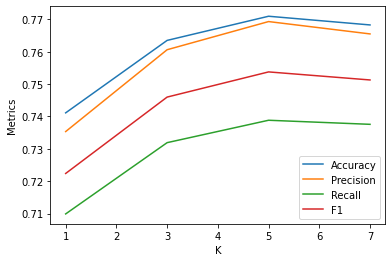

In [31]:

plt.plot(k_range, accs, label='Accuracy')
plt.plot(k_range, precision, label='Precision')
plt.plot(k_range, recalls, label='Recall')
plt.plot(k_range, f1measure, label='F1')
plt.xlabel('K')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [32]:
KNN_feature=['KNN Feature', accs[3], precision[3], recalls[3], f1measure[3]]
KNN_feature
     

['KNN Feature',
 0.7682890415049268,
 0.7655127367733507,
 0.7375707992448081,
 0.7512820512820512]

In [37]:
t = PrettyTable(['Classification', 'Accuracy', 'Precision', 'Recall', 'F1'])
t.add_row(RF)
t.add_row(NB)
t.add_row(Tree)
t.add_row(KNN)
t.add_row(RF_Feature)
t.add_row(NB_feature)
t.add_row(Tree_Feature)
t.add_row(KNN_feature)
print(t)

+-----------------------+--------------------+--------------------+--------------------+--------------------+
|     Classification    |      Accuracy      |     Precision      |       Recall       |         F1         |
+-----------------------+--------------------+--------------------+--------------------+--------------------+
|      RandomForest     |        0.84        |        0.81        |        0.87        |        0.84        |
|       NeiveBayes      |        0.73        |        0.78        |        0.58        |        0.67        |
|     Decision Tree     |        0.8         |        0.79        |        0.78        |        0.78        |
|          KNN          | 0.7805315019408778 | 0.7740693196405648 | 0.7589679043423537 | 0.7664442326024785 |
|  RandomForestFeature  |        0.84        |        0.81        |        0.87        |        0.84        |
|   NeiveBayesFeature   |        0.74        |        0.83        |        0.56        |        0.67        |
| Decision

#Task 4. 
For a given dataset in the Lab #5 (**credit card dataset**), perform feature selection and thencompare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression, SVM, Random Forest and NaiveBayes) based on accuracy, precision, recall, f1 measures.


In [ ]:
# code
data = pd.read_csv('creditcard.csv')
# data = load_data.head(int(load_data[['Class']].count()/3))
x =data.drop('Class', axis=1)
y = data[['Class']]
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=1)

In [ ]:
clf = svm.SVC()
clf.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

[0 0 0 ... 0 0 0]
Accuracy: 0.9984199992977775
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


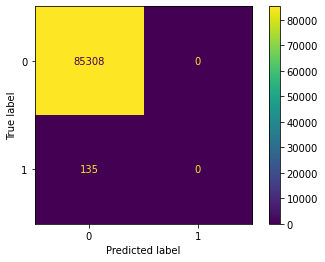

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
RBF = ["RBF", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

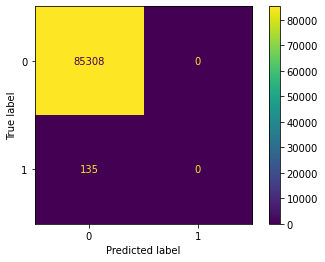

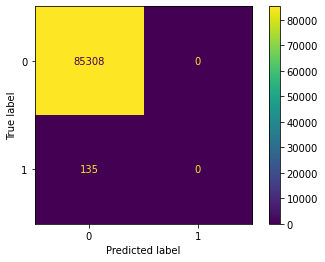

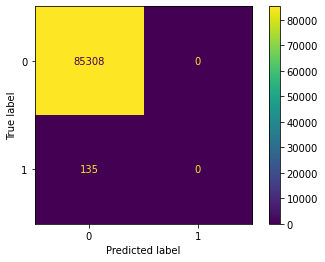

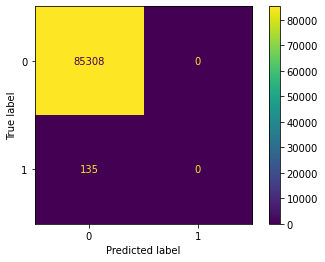

In [ ]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(metrics.accuracy_score(y_test, pred))
  prec.append(metrics.precision_score(y_test, pred))
  recall.append( metrics.recall_score(y_test, pred))
  f1.append(metrics.f1_score(y_test, pred))
  metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

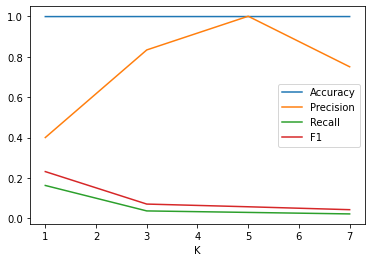

In [ ]:
plt.plot(k_range, acc, label='Accuracy')
plt.plot(k_range, prec, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel('K')
plt.legend()

In [ ]:
knn=['KNN', round(acc[2],2), round(prec[2],2), round(recall[2],2), round(f1[2],2)]

In [ ]:
#tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

[0 0 0 ... 0 0 0]
Accuracy: 0.9885420689816603
Precision: 0.10412757973733583
Recall: 0.8222222222222222
F1: 0.18484596169858453


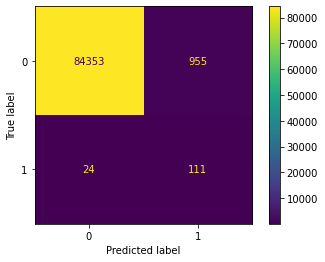

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
tree = ["Decision Tree", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

In [ ]:
#logistic regression
logistic = LogisticRegression(random_state=1)
logistic.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

[0 0 0 ... 0 0 0]
Accuracy: 0.9991456292499094
Precision: 0.7279411764705882
Recall: 0.7333333333333333
F1: 0.7306273062730627


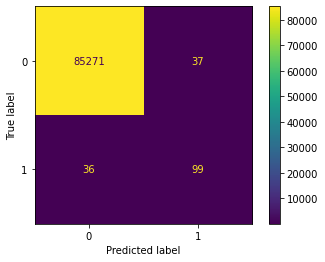

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
logic = ["Logistic Regression", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

In [ ]:
#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

<ipython-input-147-2aa6ef18f55a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier()

[0 0 0 ... 0 0 0]
Accuracy:  0.9994850368081645
Precision:  0.9099099099099099
Recall:  0.7481481481481481
F1:  0.821138211382114


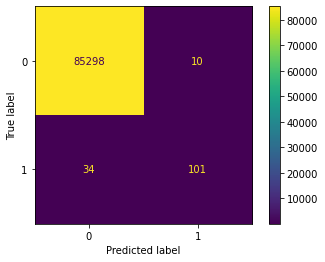

In [ ]:

y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
RF=['RF', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [ ]:
#NaiveBayes
clf = GaussianNB()
clf.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

[0 0 0 ... 0 0 0]
Accuracy:  0.9933288859239493
Precision:  0.5705514051998223
Recall:  0.8154648775938691
F1:  0.6142279132386735


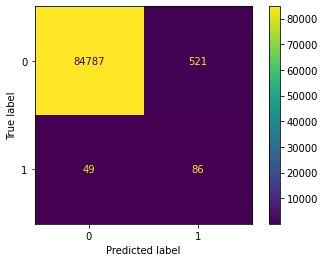

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict, average='macro')
rs = metrics.recall_score(y_test, y_predict, average='macro')
fs = metrics.f1_score(y_test, y_predict, average='macro')
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
NB=['Naive Bayes', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [ ]:
clf = RandomForestClassifier()
clf.fit(x, y)

<ipython-input-152-1f95e2692a10>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x, y)


RandomForestClassifier()

In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index=clf.feature_names_in_).sort_values(ascending=False)
feature_imp

V17       0.194172
V12       0.124989
V14       0.122477
V11       0.069105
V10       0.065876
V18       0.046494
V16       0.044245
V9        0.036311
V7        0.027229
V4        0.024334
V21       0.022267
V26       0.018410
V3        0.016417
V1        0.014893
V27       0.013727
V6        0.012643
V20       0.012506
Time      0.011816
V5        0.011599
V15       0.011423
V19       0.011408
Amount    0.010732
V2        0.010696
V22       0.010550
V8        0.010416
V13       0.010236
V28       0.010192
V25       0.009257
V24       0.008419
V23       0.007161
dtype: float64

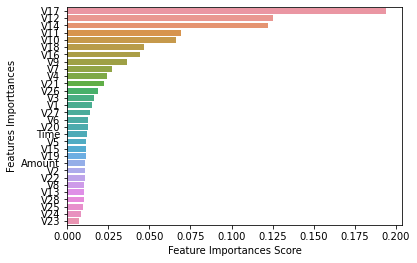

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importances Score')
plt.ylabel('Features Importtances')
plt.show()

In [ ]:
x_new = x[feature_imp[feature_imp > 0.02].index.values]
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=1)

In [ ]:
clf = svm.SVC()
clf.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

[0 0 0 ... 0 0 0]
Accuracy: 0.9993328885923949
Precision: 0.9239130434782609
Recall: 0.6296296296296297
F1: 0.748898678414097


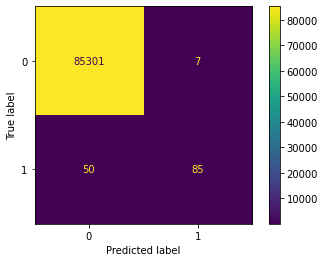

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
RBF_feature = ["RBF Feature", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

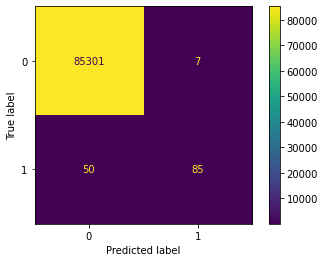

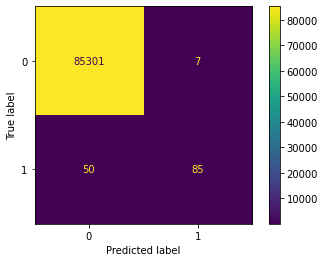

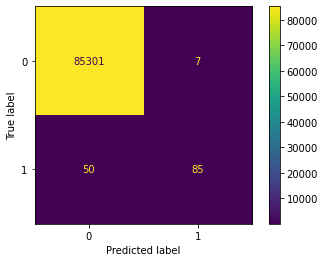

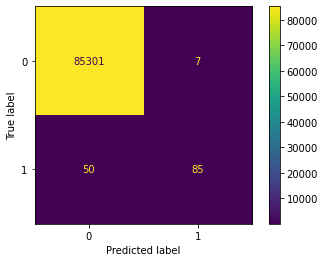

In [ ]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(metrics.accuracy_score(y_test, pred))
  prec.append(metrics.precision_score(y_test, pred))
  recall.append( metrics.recall_score(y_test, pred))
  f1.append(metrics.f1_score(y_test, pred))
  metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

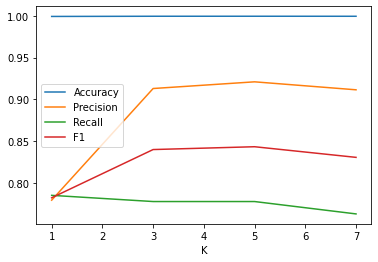

In [ ]:
plt.plot(k_range, acc, label='Accuracy')
plt.plot(k_range, prec, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel('K')
plt.legend()

In [ ]:
KNN_feature=['KNN Feature', round(acc[2],2), round(prec[2],2), round(recall[2],2), round(f1[2],2)]
KNN_feature

['KNN Feature', 1.0, 0.92, 0.78, 0.84]

In [ ]:
#tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

[0 0 0 ... 0 0 0]
Accuracy: 0.9992626663389628
Precision: 0.7857142857142857
Recall: 0.7333333333333333
F1: 0.7586206896551724


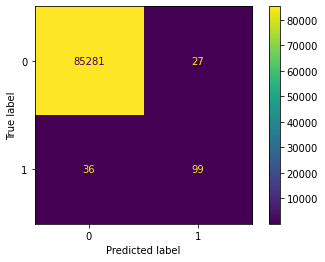

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
tree_feature = ["Decision Tree Feature", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

In [ ]:
#logistic regression
logistic = LogisticRegression(random_state=1)
logistic.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=1)

[0 0 0 ... 0 0 0]
Accuracy: 0.9992626663389628
Precision: 0.7857142857142857
Recall: 0.7333333333333333
F1: 0.7586206896551724


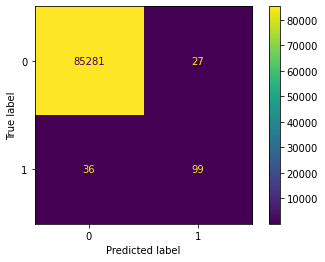

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
logic_feature = ["Logistic Regression Feature", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

In [ ]:
#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

<ipython-input-175-2aa6ef18f55a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier()

[0 0 0 ... 0 0 0]
Accuracy:  0.9994850368081645
Precision:  0.8888888888888888
Recall:  0.7703703703703704
F1:  0.8253968253968255


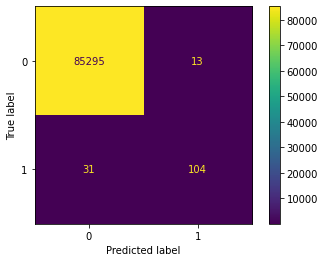

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
RF_feature=['RF Feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [ ]:
#NaiveBayes
clf = GaussianNB()
clf.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

[0 0 0 ... 0 0 0]
Accuracy:  0.9885420689816603
Precision:  0.5519215710175592
Recall:  0.9055137462684234
F1:  0.5895382237994646


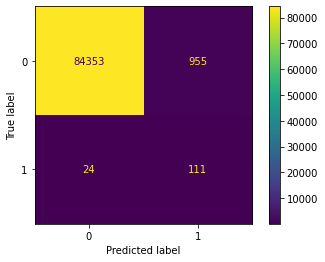

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict, average='macro')
rs = metrics.recall_score(y_test, y_predict, average='macro')
fs = metrics.f1_score(y_test, y_predict, average='macro')
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
NB_feature=['Naive Bayes Feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [ ]:
t = PrettyTable(['Classification', 'Accuracy', 'Precision', 'Recall', 'F1'])
t.add_row(logic)
t.add_row(knn)
t.add_row(tree)
t.add_row(RBF)
t.add_row(RF)
t.add_row(NB)
t.add_row(logic_feature)
t.add_row(KNN_feature)
t.add_row(tree_feature)
t.add_row(RBF_feature)
t.add_row(RF_feature)
t.add_row(NB_feature)
print(t)

+-----------------------------+----------+-----------+--------+------+
|        Classification       | Accuracy | Precision | Recall |  F1  |
+-----------------------------+----------+-----------+--------+------+
|     Logistic Regression     |   1.0    |    0.73   |  0.73  | 0.73 |
|             KNN             |   1.0    |    1.0    |  0.03  | 0.06 |
|        Decision Tree        |   0.99   |    0.1    |  0.82  | 0.18 |
|             RBF             |   1.0    |    0.0    |  0.0   | 0.0  |
|              RF             |   1.0    |    0.91   |  0.75  | 0.82 |
|         Naive Bayes         |   0.99   |    0.57   |  0.82  | 0.61 |
| Logistic Regression Feature |   1.0    |    0.79   |  0.73  | 0.76 |
|         KNN Feature         |   1.0    |    0.92   |  0.78  | 0.84 |
|    Decision Tree Feature    |   1.0    |    0.79   |  0.73  | 0.76 |
|         RBF Feature         |   1.0    |    0.92   |  0.63  | 0.75 |
|          RF Feature         |   1.0    |    0.89   |  0.77  | 0.83 |
|     

#Finally,
Save a copy in your Github. Remember renaming the notebook.